In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
import matplotlib as mpl

$$ \vec{\tau} = \vec{r} \times \vec{F} = \begin{vmatrix} 
\hat{i} & \hat{j} & \hat{k} \\ 
r_{x} & r_{y} & r_{k} \\
F_{x} & F_{y} & F_{k} \\
\end{vmatrix} $$

$$ T = rf $$ 

$$ W = Fd $$

$$  v = wr $$

$$  \vec{V} = \vec{\omega}\times \vec{r} $$

In [2]:
r = np.ones(3)
f = np.ones(3)

In [3]:
r[0] = 1.
r[1] = 4.
r[2] = 0.

f[0] = 0.
f[1] = 1.
f[2] = 0.

In [4]:
print(r)
print(f)

[1. 4. 0.]
[0. 1. 0.]


In [5]:
def Mag(v):
    return np.sqrt(np.dot(v,v))

In [6]:
def ProductoCruz(r,f):
    
    t = r.copy()
    
    t[0] = r[1]*f[2] - r[2]*f[1]
    t[1] = - (r[0]*f[2] - r[2]*f[0])
    t[2] = r[0]*f[1] - r[1]*f[0]
    
    return t

In [7]:
tau = ProductoCruz(r,f)

In [8]:
print(tau)

[ 0. -0.  1.]


In [9]:
print(Mag(r))

4.123105625617661


In [10]:
j = np.linspace(0,2*np.pi, 100)
xc = Mag(r)*np.cos(j)
yc = Mag(r)*np.sin(j)

<IPython.core.display.Javascript object>


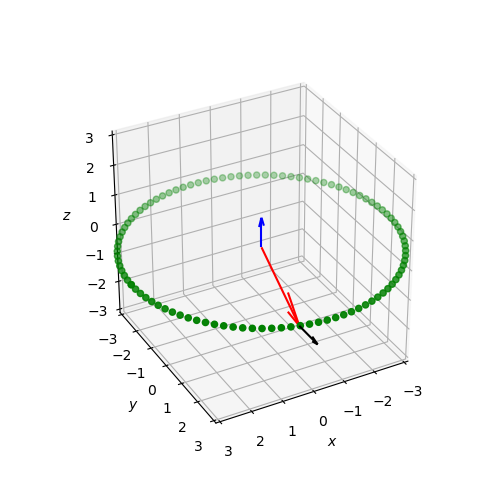

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1, projection='3d',elev = 30, azim = 50)

lim = 3

ax.set_xlim3d(-lim,lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(-lim,lim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.scatter(xc,yc,color='g')

ax.quiver(0.,0.,0.,r[0],r[1],r[2],color='r')
#ax.quiver(0.,0.,0.,f[0],f[1],f[2],color='k')
ax.quiver(r[0],r[1],r[2],f[0],f[1],f[2],color='k')
ax.quiver(0.,0.,0.,tau[0],tau[1],tau[2],color='b')


In [12]:
# Evolucion 
m = 0.5
t = np.linspace(0,4,200)
# Aceleracion angular
I = 0.5*m*Mag(r)**2
alpha = tau/I 
print(alpha)

[ 0.         -0.          0.23529412]


In [13]:
omega = np.zeros(3)
print(omega)

[0. 0. 0.]


In [14]:
omega0 = omega.copy()

In [23]:
theta = omega0[2]*t + 0.5*alpha[2]*t**2
omega1 = omega0[2] + alpha[2]*t  
#print(theta)
#print(omega1)

In [16]:
x = Mag(r)*np.cos(theta)
y = Mag(r)*np.sin(theta)
z = np.zeros(len(t))

In [17]:
Posicion = np.zeros((len(t),3))
Velocidad = np.zeros((len(t),3))
#print(Posicion)

In [18]:
for i in range(len(t)):
    Posicion[i,0] = x[i]
    Posicion[i,1] = y[i]
    Posicion[i,2] = z[i]
    
    rtmp = np.array([x[i],y[i],z[i]])
    omegatmp = np.array([0.,0,omega1[i]])
    
    Velocidad[i,0] = ProductoCruz(omegatmp,rtmp)[0]
    Velocidad[i,1] = ProductoCruz(omegatmp,rtmp)[1]
    Velocidad[i,2] = ProductoCruz(omegatmp,rtmp)[2]
#print(Posicion)

In [19]:
print(Velocidad)

[[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [-9.26909535e-07  1.95003517e-02  0.00000000e+00]
 [-7.41527623e-06  3.90007028e-02  0.00000000e+00]
 [-2.50265567e-05  5.85010499e-02  0.00000000e+00]
 [-5.93222045e-05  7.80013845e-02  0.00000000e+00]
 [-1.15863665e-04  9.75016900e-02  0.00000000e+00]
 [-2.00212362e-04  1.17001939e-01  0.00000000e+00]
 [-3.17929683e-04  1.36502092e-01  0.00000000e+00]
 [-4.74576950e-04  1.56002092e-01  0.00000000e+00]
 [-6.75715382e-04  1.75501865e-01  0.00000000e+00]
 [-9.26906045e-04  1.95001315e-01  0.00000000e+00]
 [-1.23370979e-03  2.14500322e-01  0.00000000e+00]
 [-1.60168717e-03  2.33998740e-01  0.00000000e+00]
 [-2.03639835e-03  2.53496394e-01  0.00000000e+00]
 [-2.54340297e-03  2.72993077e-01  0.00000000e+00]
 [-3.12826004e-03  2.92488548e-01  0.00000000e+00]
 [-3.79652776e-03  3.11982529e-01  0.00000000e+00]
 [-4.55376332e-03  3.31474702e-01  0.00000000e+00]
 [-5.40552272e-03  3.50964707e-01  0.00000000e+00]
 [-6.35736051e-03  3.70452138e-

<IPython.core.display.Javascript object>


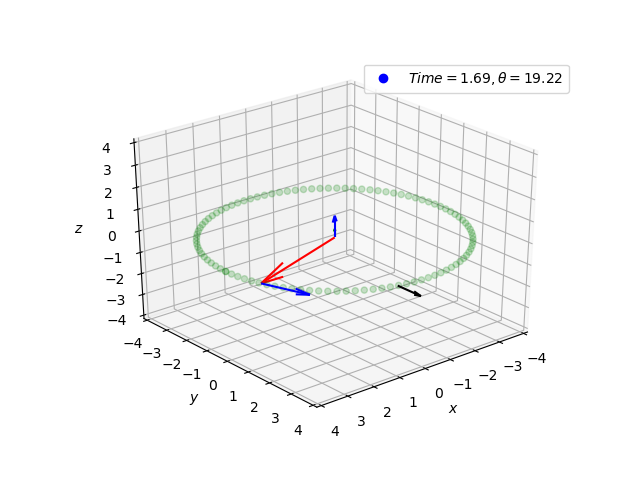

In [22]:
# Animacion
Nframes = len(t) 

fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)

def Init():
    lim = 4

    ax.set_xlim3d(-lim,lim)
    ax.set_ylim3d(-lim,lim)
    ax.set_zlim3d(-lim,lim)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
def Update(i):
    plot = ax.clear()
    Init()
    
    ax.scatter(xc,yc,color='g',alpha=0.2)
    
    plot = ax.quiver(0.,0.,0.,Posicion[i,0],Posicion[i,1],Posicion[i,2],color='r')
    #plot = ax.quiver(0.,0.,0.,f[0],f[1],f[2],color='k')
    plot = ax.quiver(r[0],r[1],r[2],f[0],f[1],f[2],color='k')
   # plot = ax.quiver(Posicion[i,0],Posicion[i,1],Posicion[i,2],f[0],f[1],f[2],color='k')
    plot = ax.quiver(0.,0.,0.,tau[0],tau[1],tau[2],color='b')
    plot = ax.quiver(0.,0.,0.,0.,0.,omega1[i],color='g')
    plot = ax.quiver(Posicion[i,0],Posicion[i,1],Posicion[i,2],Velocidad[i,0],Velocidad[i,1],Velocidad[i,2],color='b')
    
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')
    plot = ax.legend([fake2Dline], [r'$Time = %.2f, \theta= %.2f$' %(t[i],theta[i]/np.pi*180.)], numpoints=1)
    
    return plot
    
Animation = animation.FuncAnimation(fig1, Update, frames=Nframes, init_func=Init)